# Caso de Estudio - Reducción de la dimensionalidad para el Iris

In [1]:
import pandas as pd

iris = pd.read_csv("datasets/iris.csv")

iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal.length  150 non-null    float64
 1   sepal.width   150 non-null    float64
 2   petal.length  150 non-null    float64
 3   petal.width   150 non-null    float64
 4   variety       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [2]:
X = iris[ ["sepal.length", "sepal.width", "petal.length", "petal.width"] ].values
y = iris["variety"].values

X.shape, y.shape

((150, 4), (150,))

In [3]:
from sklearn.tree import DecisionTreeClassifier

clf = DecisionTreeClassifier()

clf.fit(X, y)

clf.score(X, y)

1.0

In [4]:
iris.sample(10)

,sepal.length,sepal.width,petal.length,petal.width,variety
12,4.8,3.0,1.4,0.1,Setosa
60,5.0,2.0,3.5,1.0,Versicolor
5,5.4,3.9,1.7,0.4,Setosa
141,6.9,3.1,5.1,2.3,Virginica
97,6.2,2.9,4.3,1.3,Versicolor
131,7.9,3.8,6.4,2.0,Virginica
44,5.1,3.8,1.9,0.4,Setosa
27,5.2,3.5,1.5,0.2,Setosa
36,5.5,3.5,1.3,0.2,Setosa
15,5.7,4.4,1.5,0.4,Setosa


In [5]:
clf.predict([
    [4.8, 3.1, 1.5, 0.2], # SETOSA
    [5.1, 2.1, 3.4, 1.1], # VERSICOLOR
    [8.0, 3.9, 6.3, 2.1], # VIRGINICA
    [7.0, 3.0, 4.5, 1.8], # ¿VIRGINICA | VERSICOLOR?
])

array(['Setosa', 'Versicolor', 'Virginica', 'Virginica'], dtype=object)

## Reducción de la Dimensionalidad

La matriz X representa las características (columnas) de cada muestra (filas). Podemos reducir la dimensionalidad, que sería equivalente a decir que reducimos o sustituimos el número de características por nuevos componentes que tienen la mínima correlación entre ellos y la máxima varianza (dispersión). 

$X' = PCA(X, 2)$

In [7]:
from sklearn.decomposition import PCA

Xp = PCA(n_components=2).fit_transform(X) # 4 -> 2

Xp.shape, X.shape

((150, 2), (150, 4))

In [8]:
X[:5]

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2]])

In [9]:
Xp[:5]

array([[-2.68412563,  0.31939725],
       [-2.71414169, -0.17700123],
       [-2.88899057, -0.14494943],
       [-2.74534286, -0.31829898],
       [-2.72871654,  0.32675451]])

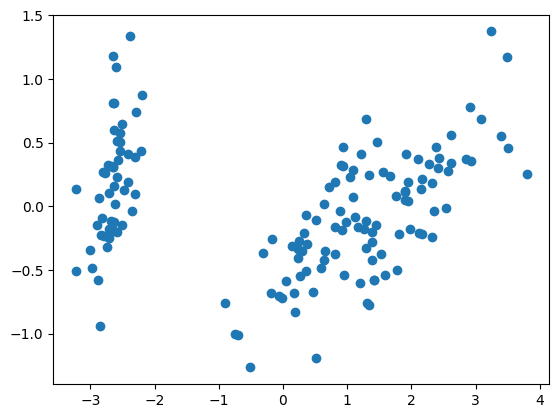

In [11]:
import matplotlib.pyplot as plt

plt.scatter(Xp[:, 0], Xp[:, 1])
plt.show()

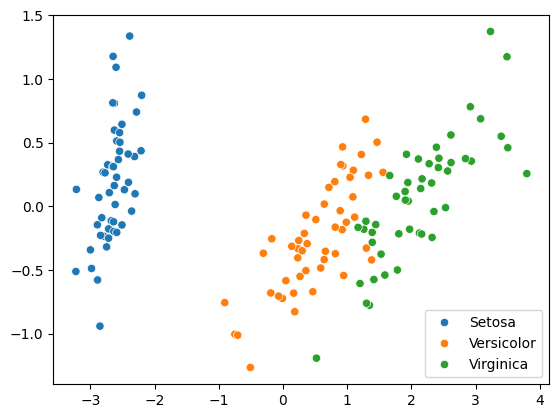

In [13]:
import seaborn as sns

sns.scatterplot(x=Xp[:, 0], y=Xp[:, 1], hue=y)
plt.show()

In [14]:
from sklearn.tree import DecisionTreeClassifier

clf = DecisionTreeClassifier()

clf.fit(Xp, y)

clf.score(Xp, y)

1.0

In [15]:
from sklearn.svm import SVC

clf = SVC(kernel="linear") # Súper rápido y eficiente

clf.fit(Xp, y) # Sólo entrenamos con 150 * 2 = 300 versus 150 * 4 = 600 (50% menos memoria)

clf.score(Xp, y)

0.9666666666666667

In [16]:
from sklearn.decomposition import PCA

Xpp = PCA(n_components=1).fit_transform(X)

Xpp.shape, X.shape

((150, 1), (150, 4))

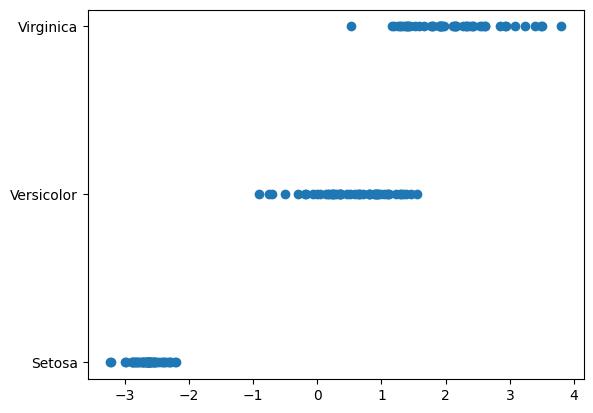

In [17]:
import matplotlib.pyplot as plt

plt.scatter(Xpp[:, 0], y)
plt.show()

In [18]:
from sklearn.tree import DecisionTreeClassifier

clf = DecisionTreeClassifier()

clf.fit(Xpp, y)

clf.score(Xpp, y)

1.0

In [19]:
from sklearn.svm import SVC

clf = SVC(kernel="linear") # Súper rápido y eficiente

clf.fit(Xpp, y) # Sólo entrenamos con 150 * 1 = 150 versus 150 * 4 = 600 (75% menos memoria)

clf.score(Xpp, y)

0.94

In [21]:
def test_clf(X, y, threshold=0.9):
    from sklearn.decomposition import PCA
    Xp = PCA(n_components=1).fit_transform(X)
    from sklearn.svm import SVC
    clf = SVC(kernel="linear")
    clf.fit(Xp, y)
    return clf.score(Xp, y) >= threshold
    
test_clf(X, y)

True

In [22]:
test_clf(X, y, threshold=0.75)

True

Reglas:

* 1 Componente equivale a 1 dimensión de análisis (Test inmediato "Lineal")
* 2-5 Componentes equivale a 2-5 dimensiones de análisis (Árboles de decisión)
* 6-10 Componentes equivale a 6-10 dimensiones de análisis (Máquinas de Soporte Vectorial)
* 1-1,000 Componentes equivale a 1-1,000 dimensiones de análisis (Redes Neuronales)

(1, 0.94)
(2, 0.9666666666666667)
(3, 0.9866666666666667)
(4, 0.9933333333333333)


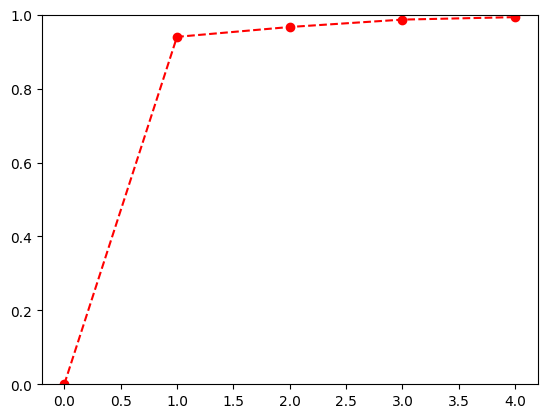

In [32]:
def score_clf(X, y, n):
    from sklearn.decomposition import PCA
    Xp = PCA(n_components=n).fit_transform(X)
    from sklearn.svm import SVC
    clf = SVC(kernel="linear")
    clf.fit(Xp, y)
    return clf.score(Xp, y)

points = [(0, 0)]

for n in range(1, X.shape[1] + 1):
    point = (n, score_clf(X, y, n))
    print(point)
    points.append(point)
    
import matplotlib.pyplot as plt

s1, s2 = zip(*points)

plt.plot(s1, s2, "ro--")
plt.ylim((0, 1))
plt.show()